In [3]:
# Beberomêtro

## Medindo o consumo de cerveja com precisão.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

Importando Dataset

In [9]:
cerveja = pd.read_csv("files/dataset/COnsumo_cerveja_1.csv")

Análise exloratória dos dados
Primeiras Observações da base de dados

In [10]:
cerveja.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


Últimas Observações

In [11]:
cerveja.tail()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
360,27/12/2015,24.00,21.1,28.2,13.6,1,32.307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26.095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22.309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20.467
364,31/12/2015,24.76,20.2,29.0,0.0,0,22.446


Dimensão da base de dados.
365 observações e 7 variáveis.

In [12]:
cerveja.shape

(365, 7)

Verificando se existem valores nulos.

In [15]:
cerveja.isna().sum()

Data                  0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitacao          0
Final_de_Semana       0
Consumo               0
dtype: int64

Tipo das variáveis

In [17]:
cerveja.dtypes

Data                   object
Temperatura_Media     float64
Temperatura_Minima    float64
Temperatura_Maxima    float64
Precipitacao          float64
Final_de_Semana         int64
Consumo               float64
dtype: object

Tabela descritiva das variáveis

In [18]:
cerveja.describe

<bound method NDFrame.describe of            Data  Temperatura_Media  Temperatura_Minima  Temperatura_Maxima  \
0    01/01/2015              27.30                23.9                32.5   
1    02/01/2015              27.02                24.5                33.5   
2    03/01/2015              24.82                22.4                29.9   
3    04/01/2015              23.98                21.5                28.6   
4    05/01/2015              23.82                21.0                28.3   
..          ...                ...                 ...                 ...   
360  27/12/2015              24.00                21.1                28.2   
361  28/12/2015              22.64                21.1                26.7   
362  29/12/2015              21.68                20.3                24.1   
363  30/12/2015              21.38                19.3                22.4   
364  31/12/2015              24.76                20.2                29.0   

     Precipitacao  Final_de_S

In [19]:
cerveja_numeric = cerveja.select_dtypes(include=['float64', 'int64'])

Gráfico correlograma

Text(0.5, 1.0, 'Correlcação Pearse')

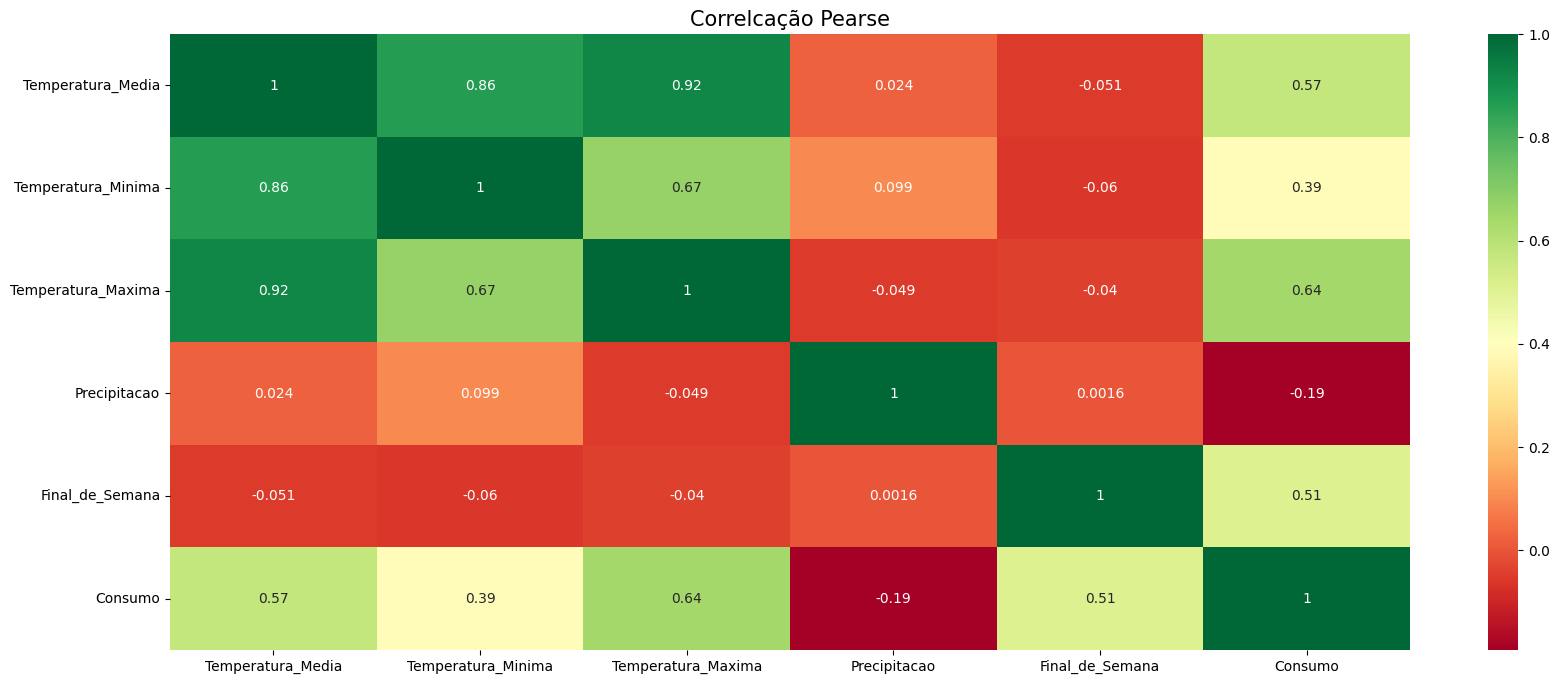

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(cerveja_numeric.corr(), annot=True, cmap= 'RdYlGn')
plt.title("Correlcação Pearse", size= 15)

As maiores correlações são as temperaturas máximas e médias e finais de semana.

In [24]:
# Variáveis independentes
x = cerveja.drop(["Consumo", "Data"], axis=1)
# Variável dependente
y = cerveja['Consumo']


In [27]:
lm1 = sm.OLS.from_formula("Consumo ~ Temperatura_Maxima", data=cerveja)
model1 = lm1.fit()
print("Analise Modelo 1")
print(model1.summary())
print("=" * 80)

Analise Modelo 1
                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     255.4
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           6.55e-44
Time:                        22:25:32   Log-Likelihood:                -960.89
No. Observations:                 365   AIC:                             1926.
Df Residuals:                     363   BIC:                             1934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          